<a href="https://colab.research.google.com/github/AKBER-HUSSAIN/ML_Lab_Practice/blob/main/Assignment2/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chosen Research Paper**

Title: Heart Disease Prediction using Machine Learning Techniques
Authors: Pooja Anbuselvan, Bangalore Institute of Technology
Journal: IJERT, Vol. 9 Issue 11, November 2020
Dataset: Cleveland Heart Disease Dataset (UCI Repository)
Algorithms Used: Logistic Regression, Naive Bayes, SVM, KNN, Decision Tree, Random Forest, XGBoost **bold text**

**Research Gap Identified**

*   No hyperparameter tuning: All algorithms use default parameters.
*  No feature extraction/selection: All 14 attributes are used without dimensionality reduction.


*   No feature scaling: KNN and SVM models require normalized inputs.
*   Single metric evaluation: Only accuracy was compared.

*   No validation strategy: Simple 80-20 split was used.








**Step 1 — Import Libraries**

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train   _test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


**Step 2 — Load Dataset**

In [2]:

df = pd.read_csv("/content/drive/MyDrive/dataset/heart_cleveland_upload.csv")   # path to your dataset

print(df.head())
print(df.info())
print(df.describe())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       29

**Step 3 — Data Pre-processing**

In [4]:

print(df.isnull().sum())


X = df.drop('condition', axis=1)
y = df['condition']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


**Step 4 — Feature Extraction (PCA)**

In [5]:

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print("Original shape:", X_scaled.shape)
print("After PCA:", X_pca.shape)


Original shape: (297, 13)
After PCA: (297, 12)


**Step 5 — Train-Test Split**

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)


**Step 6 — Define Base Models**

In [7]:

models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier()
}


**Step 7 — Train and Evaluate Before Tuning**

In [8]:

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: {acc*100:.2f}%")


Logistic Regression: 90.00%
Decision Tree: 75.00%
KNN: 86.67%
SVM: 90.00%
Random Forest: 86.67%


**Step 8 — Hyperparameter Tuning with GridSearchCV**

In [10]:

knn_params = {'n_neighbors': [3,5,7,9,11], 'metric': ['euclidean','manhattan']}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)
print("Best KNN params:", grid_knn.best_params_)
print("Best KNN score:", grid_knn.best_score_)


dt_params = {'criterion': ['gini','entropy'], 'max_depth': [3,5,7,9,11]}
grid_dt = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)
print("Best DT params:", grid_dt.best_params_)
print("Best DT score:", grid_dt.best_score_)


svm_params = {'C':[0.1,1,10], 'kernel':['linear','rbf','poly'], 'gamma':['scale','auto']}
grid_svm = GridSearchCV(SVC(probability=True), svm_params, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)
print("Best SVM params:", grid_svm.best_params_)
print("Best SVM score:", grid_svm.best_score_)


rf_params = {'n_estimators':[100,200,300], 'max_depth':[4,6,8,10], 'min_samples_leaf':[1,2,4]}
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)
print("Best RF params:", grid_rf.best_params_)
print("Best RF score:", grid_rf.best_score_)


Best KNN params: {'metric': 'manhattan', 'n_neighbors': 11}
Best KNN score: 0.8188829787234042
Best DT params: {'criterion': 'entropy', 'max_depth': 3}
Best DT score: 0.7723404255319148
Best SVM params: {'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
Best SVM score: 0.8315602836879433
Best RF params: {'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 300}
Best RF score: 0.8144503546099291


**Step 9 — Evaluate Tuned Mod**els

In [11]:

best_models = {
    "KNN": grid_knn.best_estimator_,
    "Decision Tree": grid_dt.best_estimator_,
    "SVM": grid_svm.best_estimator_,
    "Random Forest": grid_rf.best_estimator_
}

results = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = classification_report(y_test, y_pred, output_dict=True)['weighted avg']['f1-score']
    results[name] = [acc, f1]
    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

results_df = pd.DataFrame(results, index=['Accuracy','F1-score']).T
print(results_df)



KNN Results:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90        32
           1       1.00      0.75      0.86        28

    accuracy                           0.88        60
   macro avg       0.91      0.88      0.88        60
weighted avg       0.90      0.88      0.88        60

[[32  0]
 [ 7 21]]

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.70      0.97      0.82        32
           1       0.94      0.54      0.68        28

    accuracy                           0.77        60
   macro avg       0.82      0.75      0.75        60
weighted avg       0.81      0.77      0.75        60

[[31  1]
 [13 15]]

SVM Results:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        32
           1       1.00      0.68      0.81        28

    accuracy                           0.85        60
   macro avg       0.89      0.84     

**Step 10 — ROC Curves Visualization**

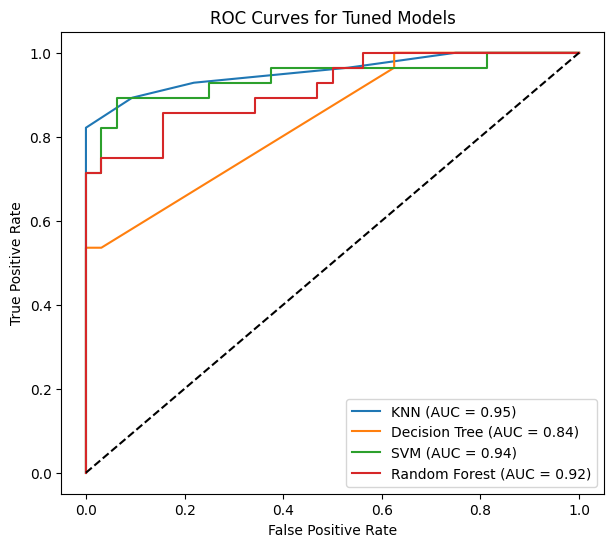

In [12]:
plt.figure(figsize=(7,6))
for name, model in best_models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')

plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Tuned Models')
plt.legend()
plt.show()
